# Lec4 量子近似最適化アルゴリズム（QAOA ）
Reference
- [[Youtube]【誰でも量子コンピュータ！QAOA編】Quantum Computing for You【追加公演第4回・9/30実施】](https://www.youtube.com/watch?v=7h2mticpcFc&t)

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex
from sympy.physics.quantum.qubit import matrix_to_qubit
from qiskit.visualization import plot_bloch_multivector
import numpy as np

---
#### 復習

In [2]:
n = 1
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

In [3]:
qc.x(qr)
qc.z(qr)

In [4]:
qc.draw()

┌───┐┌───┐
q1: ┤ X ├┤ Z ├
    └───┘└───┘

In [5]:
def sim_state(qc, disp=True):
    sim = Aer.get_backend('statevector_simulator')
    qc = transpile(qc, backend=sim)
    res = sim.run(qc).result()
    state = res.data()['statevector']
    if disp:
        ket = matrix_to_qubit(np.array(state)[:, np.newaxis])
        print(ket)
    return state

In [6]:
state = sim_state(qc)

-1.0*|1>


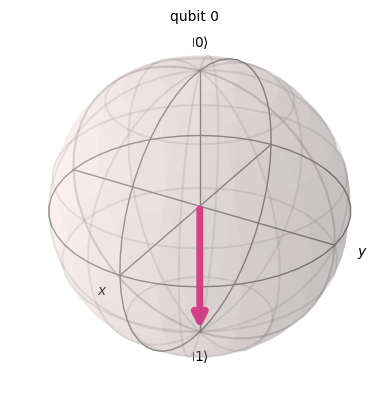

In [7]:
plot_bloch_multivector(state)

---

In [8]:
n = 1
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

In [9]:
qc.h(qr)

In [10]:
qc.draw()

┌───┐
q4: ┤ H ├
    └───┘

In [11]:
state = sim_state(qc)

0.707106781186548*|0> + 0.707106781186547*|1>


In [12]:
from qiskit.visualization import plot_histogram

def sim_state_exp(qc):
    '''
    '''
    qc.measure_all()
    sim = Aer.get_backend('qasm_simulator')
    qc = transpile(qc, backend=sim)
    res = sim.run(qc).result()
    ans = res.get_counts()
    return ans

In [13]:
ans = sim_state_exp(qc)

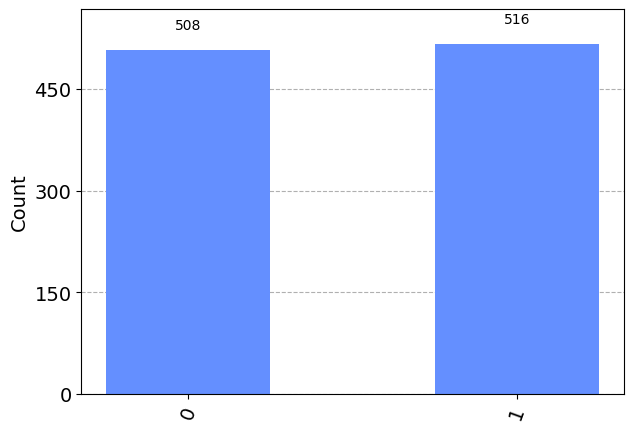

In [14]:
plot_histogram(ans)

#### 磁石の量子シミュレーション


In [15]:
n = 1
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

$\exp{(iEt)} = \cos{Et} + i\sin{Et}$

In [16]:
# 量子力学では角度がエネルギー*時間に相当する。（Schorodinger's eqより）
theta = 0.1
Tall = 10

# 初期状態は重ね合わせの状態。これはXの固有状態なので、横磁場を掛けていれば状態を維持できる。
qc.h(qr)

# 横磁場を掛けてから縦磁場をかける操作を何度か繰り返す。
for k in range(Tall):
    # 横磁場。徐々に弱くしていく。
    qc.rx(theta*(1-k/Tall), qr)
    # 縦磁場。徐々に強くしていく。
    qc.rz(theta*(k/Tall), qr)

In [17]:
qc.draw()

┌───┐┌─────────┐┌───────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q9: ┤ H ├┤ Rx(0.1) ├┤ Rz(0) ├┤ Rx(0.09) ├┤ Rz(0.01) ├┤ Rx(0.08) ├┤ Rz(0.02) ├»
    └───┘└─────────┘└───────┘└──────────┘└──────────┘└──────────┘└──────────┘»
«    ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q9: ┤ Rx(0.07) ├┤ Rz(0.03) ├┤ Rx(0.06) ├┤ Rz(0.04) ├┤ Rx(0.05) ├┤ Rz(0.05) ├»
«    └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
«    ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q9: ┤ Rx(0.04) ├┤ Rz(0.06) ├┤ Rx(0.03) ├┤ Rz(0.07) ├┤ Rx(0.02) ├┤ Rz(0.08) ├»
«    └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
«    ┌──────────┐┌──────────┐
«q9: ┤ Rx(0.01) ├┤ Rz(0.09) ├
«    └──────────┘└──────────┘

In [18]:
state = sim_state(qc)

0.631540921995668*|0> - 0.342676693412097*I*|0> + 0.694636907456178*|1> - 0.0347608175498081*I*|1>


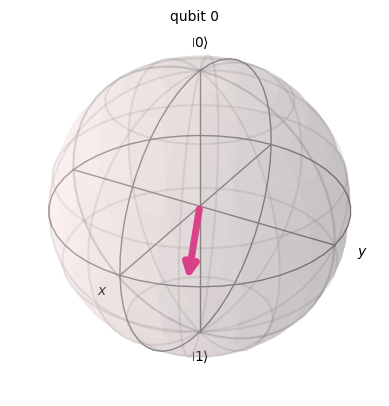

In [19]:
plot_bloch_multivector(state)

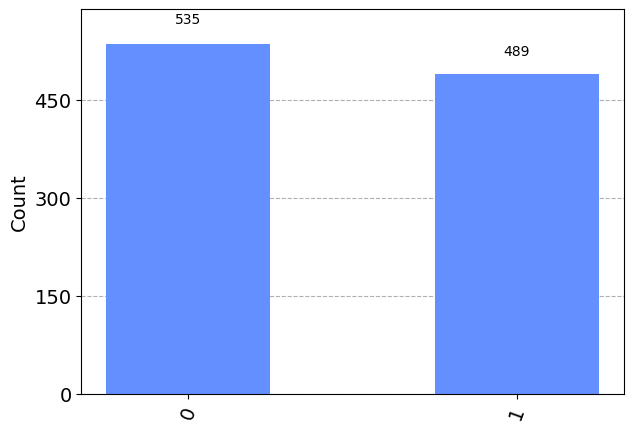

In [20]:
ans = sim_state_exp(qc)
plot_histogram(ans)